# Session 10 SHP - Decision Tree



*  **Pengertian Decision Tree**

  Decision tree atau pohon keputusan adalah diagram yang menunjukkan kemungkinan hasil dari sebuah keputusan. Diagram ini berbentuk seperti pohon dengan cabang-cabang yang mewakili berbagai pilihan dan ujung-ujung cabang yang menunjukkan hasil akhir. Pohon keputusan sering digunakan untuk membantu pengambilan keputusan yang kompleks dengan cara memvisualisasikan berbagai pilihan dan kemungkinan hasil.

![](https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png)

*   **Struktur Decision Tree**

  Decision tree digunakan dalam machine learning untuk tugas klasifikasi dan regresi. Decision tree terdiri dari jenis node berikut:

  1. **Root node**: Node paling atas dari pohon, yang mewakili kumpulan data lengkap. Ini adalah titik awal dari proses pengambilan keputusan.

  2. **Decision node**: Node yang mewakili titik keputusan. Setiap node keputusan memiliki satu atau lebih cabang, masing-masing mewakili hasil yang mungkin dari keputusan tersebut.

  3. **Leaf node**: Node yang mewakili keputusan atau hasil akhir. Leaf node tidak memiliki cabang.

  4. **Subtree**: Bagian dari pohon yang berakar pada node tertentu. Subtree terdiri dari node itu sendiri dan semua keturunannya.

## 1. Load Dataset "Data FillingA1"

**ChatGPT Prompt:**

Berikan saya code python untuk menghubungkan google colab dengan google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**ChatGPT Prompt:**

Berikan code untuk load dataset "Data FillingA1.xlsx' pada folder Dataset di google drive

In [2]:
import pandas as pd

# Path ke file Excel di Google Drive
file_path = '/content/drive/My Drive/Dataset/Data FillingA1.xlsx'

# Membaca file Excel menggunakan pandas
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama dari dataframe
print(df.head())


          dtmInsertedDate  intAugerAcc  intSpeedDischarge  intAugerTimeError  \
0 2023-10-25 19:55:03.227        12000                300                 10   
1 2023-10-25 19:55:13.193        12000                300                 10   
2 2023-10-25 19:55:23.257        12000                300                 10   
3 2023-10-25 19:55:33.207        12000                300                 10   
4 2023-10-25 19:55:43.287        12000                300                 10   

   intCrossJawSealTime  intVerticalSealTime  decCrossJawFrontSet  \
0                  300                    0                  155   
1                  300                    0                  155   
2                  300                    0                  155   
3                  300                    0                  155   
4                  300                    0                  155   

   decCrossJawFrontActual  decCrossJawRearSet  decCrossJawRearActual  \
0                   155.6             

Dataset **"Filling Mesin A1"** memiliki kolom-kolom berikut:

1. **dtmInsertedDate**: Tanggal dan waktu perekaman data, dengan format tahun-bulan-hari dan jam:menit:detik.milidetik.
2. **intAugerAcc**: Nilai akumulasi Auger, kemungkinan berhubungan dengan jumlah atau volume material yang diproses.
3. **intSpeedDischarge**: Kecepatan pengeluaran material dari mesin.
4. **intAugerTimeError**: Waktu kesalahan Auger, mungkin mengindikasikan penyimpangan dalam operasi normal.
5. **intCrossJawSealTime**: Waktu penyegelan Cross Jaw, dalam milidetik.
6. **intVerticalSealTime**: Waktu penyegelan Vertikal.
7. **decCrossJawFrontSet**: Pengaturan suhu depan Cross Jaw, dalam derajat.
8. **decCrossJawFrontActual**: Suhu aktual depan Cross Jaw.
9. **decCrossJawRearSet**: Pengaturan suhu belakang Cross Jaw.
10. **decCrossJawRearActual**: Suhu aktual belakang Cross Jaw.
11. **decVerticalJawSet**: Pengaturan suhu Jaw Vertikal.
12. **decVerticalJawActual**: Suhu aktual Jaw Vertikal.
13. **intWeight**: Berat, kemungkinan berhubungan dengan material yang diproses.
14. **intAugerSpeed**: Kecepatan Auger.
15. **Weight**: Berat tambahan atau koreksi berat.
16. **decimalBagLength**: Panjang kantong atau bungkus, dalam desimal.
17. **intMachineSpeed**: Kecepatan mesin.
18. **NoBO**: Nomor Batch Order atau identifikasi batch.
Kolom-kolom ini tampaknya menggambarkan parameter operasional dan pengukuran yang terkait dengan proses pengisian mesin A1, termasuk suhu, kecepatan, waktu, dan pengukuran berat

## 2. EDA (Exploratory Data Analysis)

**ChatGPT Prompt:**

Berikan code untuk melakukan EDA pada dataset tersebut

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dtmInsertedDate         2515 non-null   datetime64[ns]
 1   intAugerAcc             2515 non-null   int64         
 2   intSpeedDischarge       2515 non-null   int64         
 3   intAugerTimeError       2515 non-null   int64         
 4   intCrossJawSealTime     2515 non-null   int64         
 5   intVerticalSealTime     2515 non-null   int64         
 6   decCrossJawFrontSet     2515 non-null   int64         
 7   decCrossJawFrontActual  2515 non-null   float64       
 8   decCrossJawRearSet      2515 non-null   int64         
 9   decCrossJawRearActual   2515 non-null   float64       
 10  decVerticalJawSet       2515 non-null   int64         
 11  decVerticalJawActual    2515 non-null   float64       
 12  intWeight               2515 

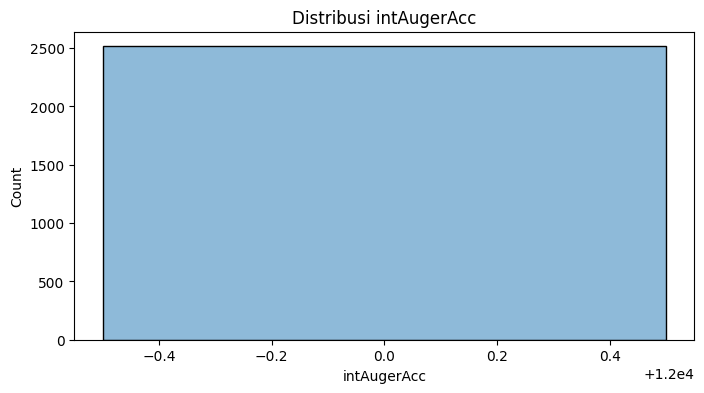

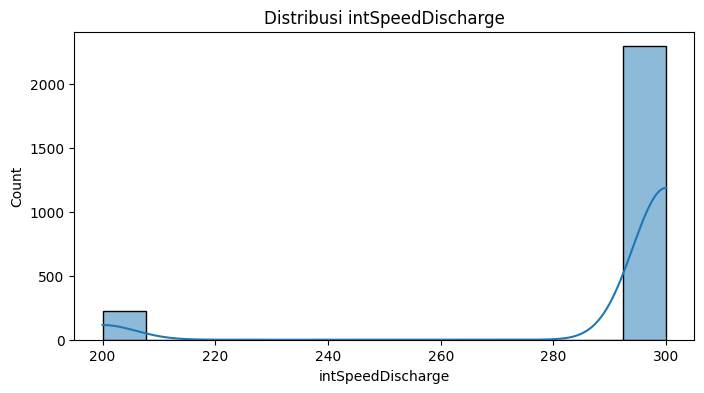

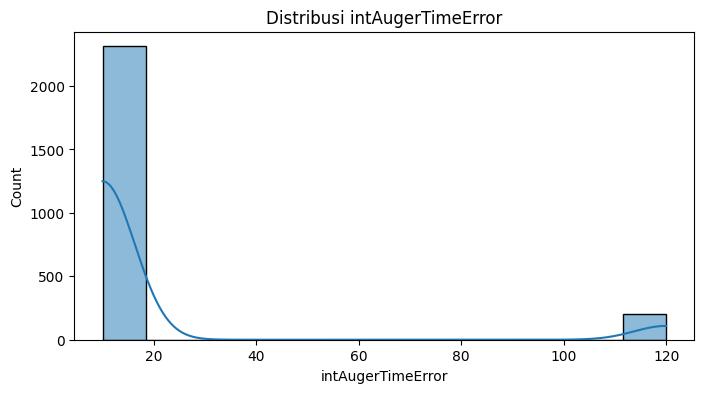

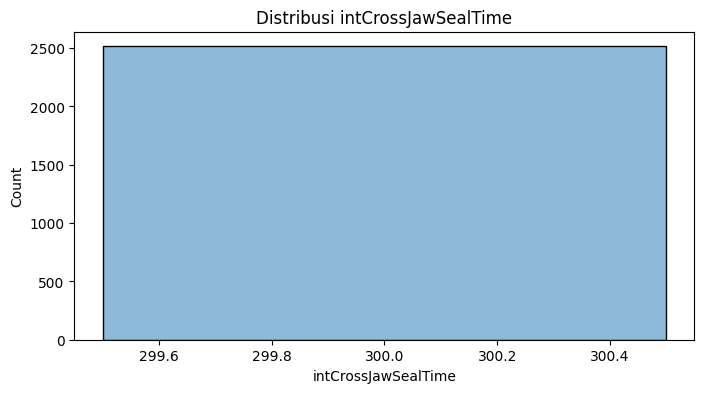

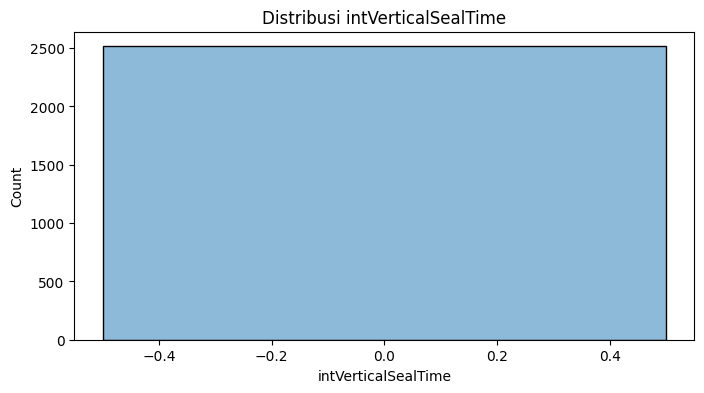

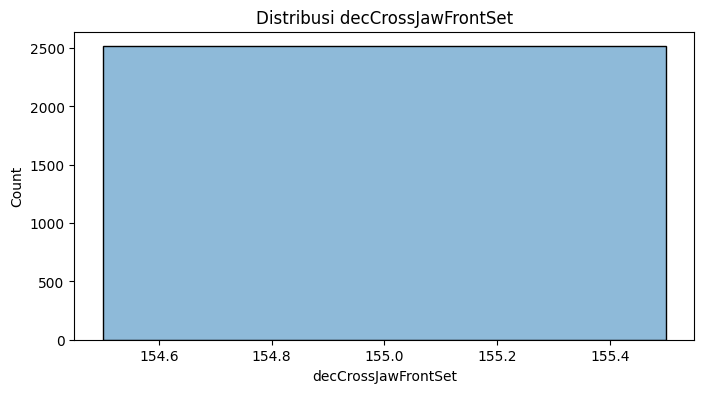

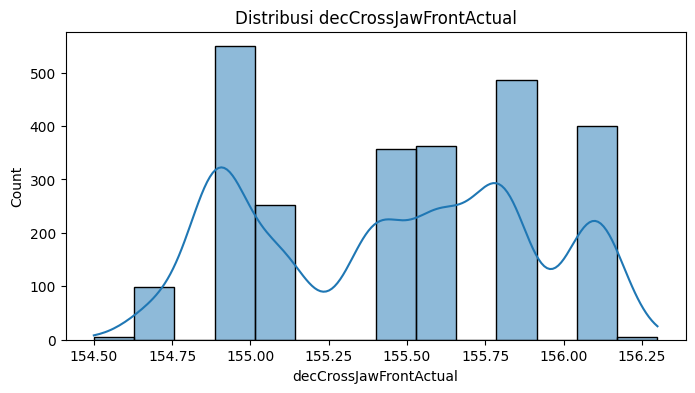

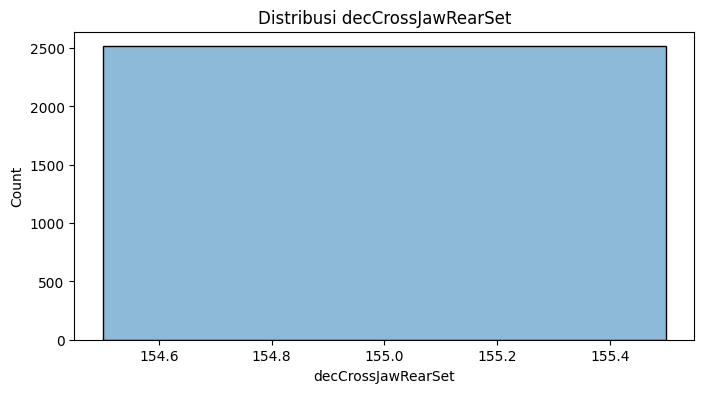

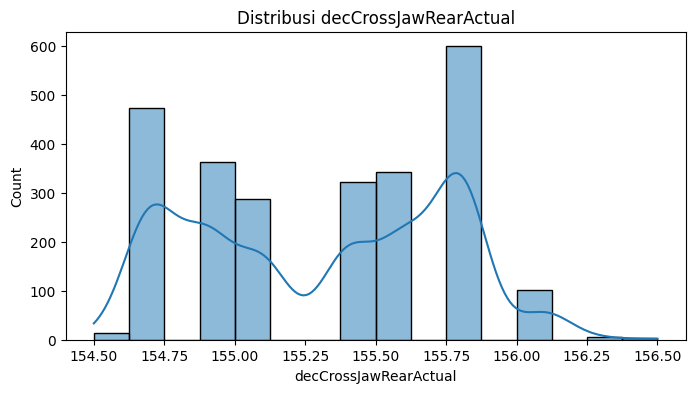

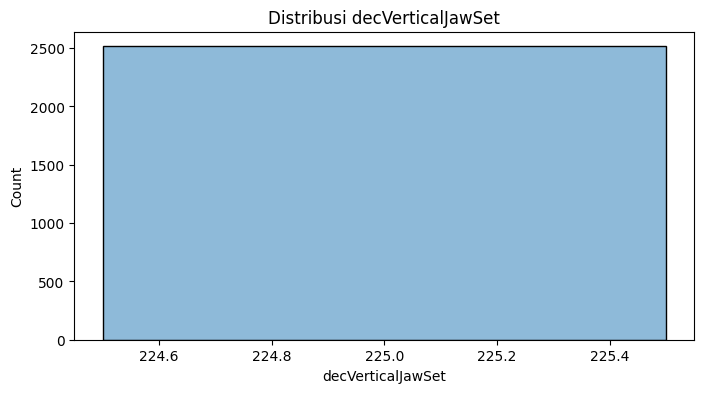

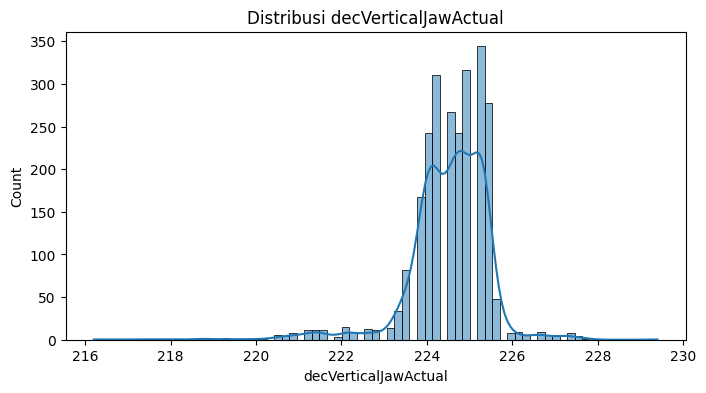

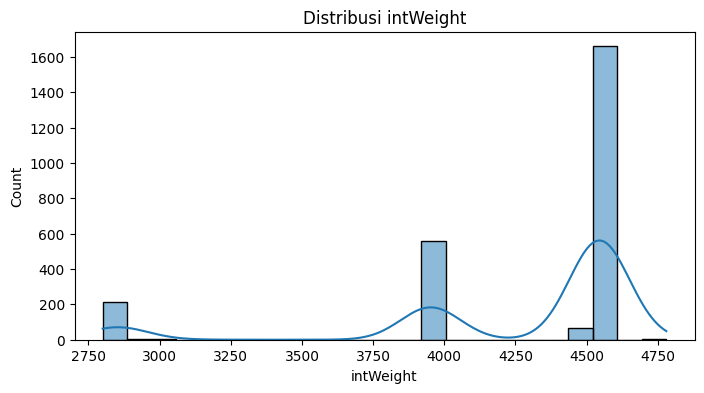

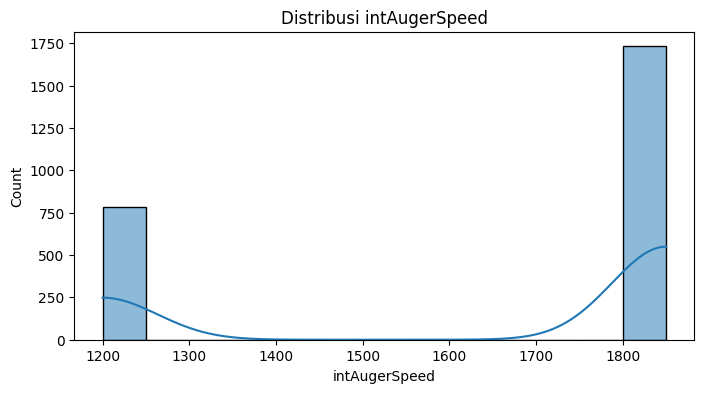

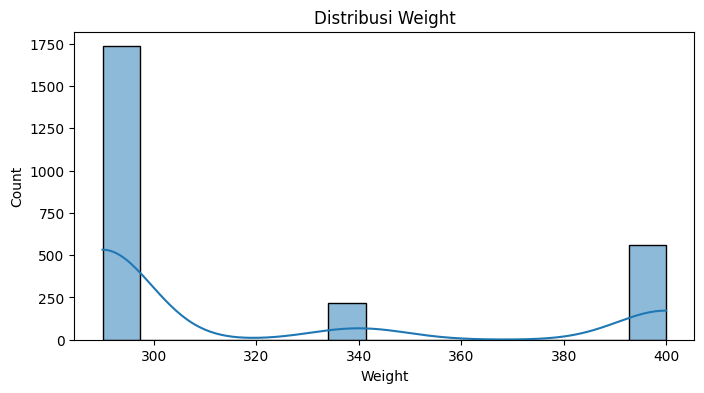

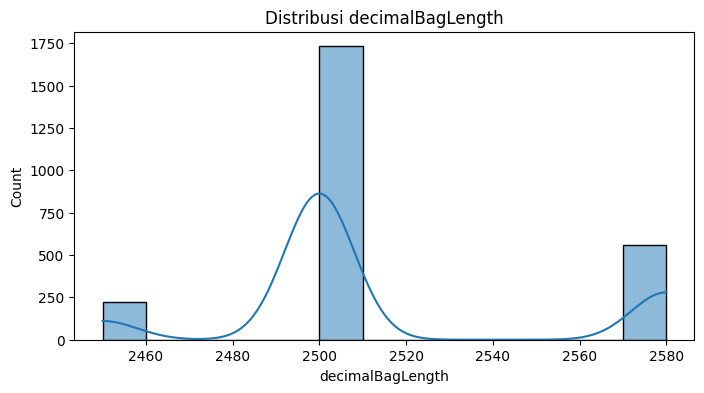

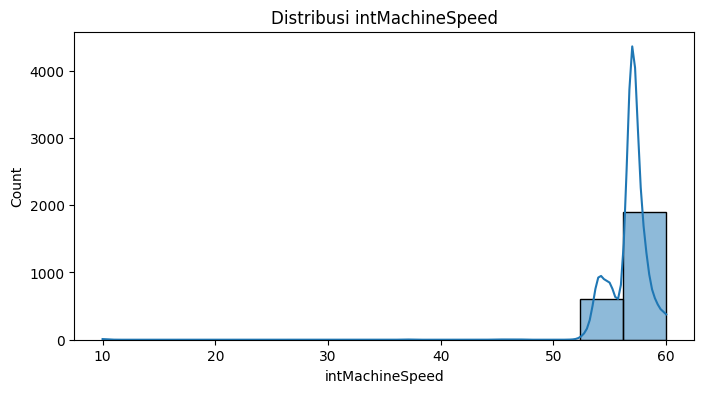

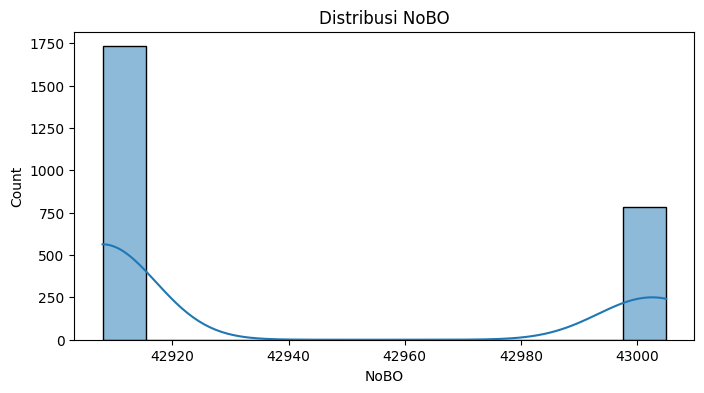

In [3]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan informasi dasar tentang dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Memeriksa missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualisasi distribusi variabel numerik
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()


## 3. Feature Selection

Feature selection adalah proses memilih fitur yang paling relevan untuk digunakan dalam model Machine Learning.

Dari eksperimen menggunakan Orange Data Mining, kita akan menggunakan **kolom "intAugerSpeed" dan "intMachineSpeed" sebagai fitur dan kolom "Weight" sebagai target**

Dalam konteks manufaktur, kolom "Berat" (Weight) sebagai target mengacu pada tujuan untuk memprediksi berat produk berdasarkan parameter operasional mesin, seperti kecepatan auger (intAugerSpeed), suhu, dan kecepatan mesin. Pendekatan ini sangat relevan jika Anda ingin memantau kinerja mesin untuk memastikan bahwa produk diisi hingga mencapai berat tertentu, yang merupakan prosedur kontrol kualitas yang umum dalam manufaktur.

Apabila "Berat" adalah hasil yang ingin Anda kendalikan (membuatnya sebagai target), maka Anda akan membangun model untuk memprediksi berat berdasarkan variabel-variabel seperti kecepatan auger. Dalam kebanyakan proses manufaktur, "Berat" sering kali menjadi variabel target karena tujuannya biasanya adalah untuk memastikan bahwa setiap produk memenuhi spesifikasi berat tertentu.

**ChatGPT Prompt:**

Berikan code untuk membagi dataset menjadi data training dan testing untuk machine learning. Atur kolom "intAugerSpeed" dan "intMachineSpeed" menjadi fitur dan kolom "Weight" menjadi target pada df


In [5]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split

# Set the features and target
features = ['intAugerSpeed', 'intMachineSpeed']
target = 'Weight'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.25, random_state=42
)

# Print the shapes of the training and testing sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (1886, 2)
X_test shape: (629, 2)
y_train shape: (1886,)
y_test shape: (629,)


## 4. Training Machine Learning

Untuk melatih model regresi linier menggunakan dataset yang Anda miliki dan kemudian mengevaluasi model tersebut, Anda dapat menggunakan library scikit-learn di Python. Langkah-langkahnya termasuk melatih model dengan data training (X_train dan y_train) dan kemudian mengevaluasi kinerjanya dengan data testing (X_test dan y_test).

ChatGPT Prompt:

Berikan code untuk melakukan training machine learning dengan menggunakan decision tree pada data training, kemudian evaluasi hasil model dengan data testing menggunakan MSE, RMSE, MAE, dan R^2

In [13]:
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

# Create the decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the regressor on the training set
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 98.85298172425989
RMSE: 9.942483679858865
MAE: 2.6620997457164934
R^2: 0.9538425440128669


## 5. Actual vs Predicted

ChatGPT Prompt:

Berikan code untuk menampilkan data prediksi dari hasil decision tree dengan data sebenarnya

In [8]:
# Combine the predicted and actual values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the combined DataFrame
print(df)

      Actual   Predicted
617      290  290.000000
927      290  290.000000
942      290  290.000000
973      290  290.000000
1967     400  397.187500
...      ...         ...
2305     400  392.941176
2030     400  397.187500
1869     340  384.383562
679      290  290.000000
761      290  290.000000

[629 rows x 2 columns]
